# Loading data

In [137]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# using a style for the plots
sns.set(rc={'axes.facecolor':"#EBE0BA",
            "figure.facecolor":"#E0D3AF",
            "grid.color":"#E0D3AF",
            "axes.edgecolor":"#424949",
            "axes.labelcolor":"#424949",
            "text.color":"#424949" # color for headlines and sub headlines
           }) 
#opening the files
train = pd.read_csv("data/train.csv").set_index("PassengerId")
test = pd.read_csv("data/test.csv").set_index("PassengerId")

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [140]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


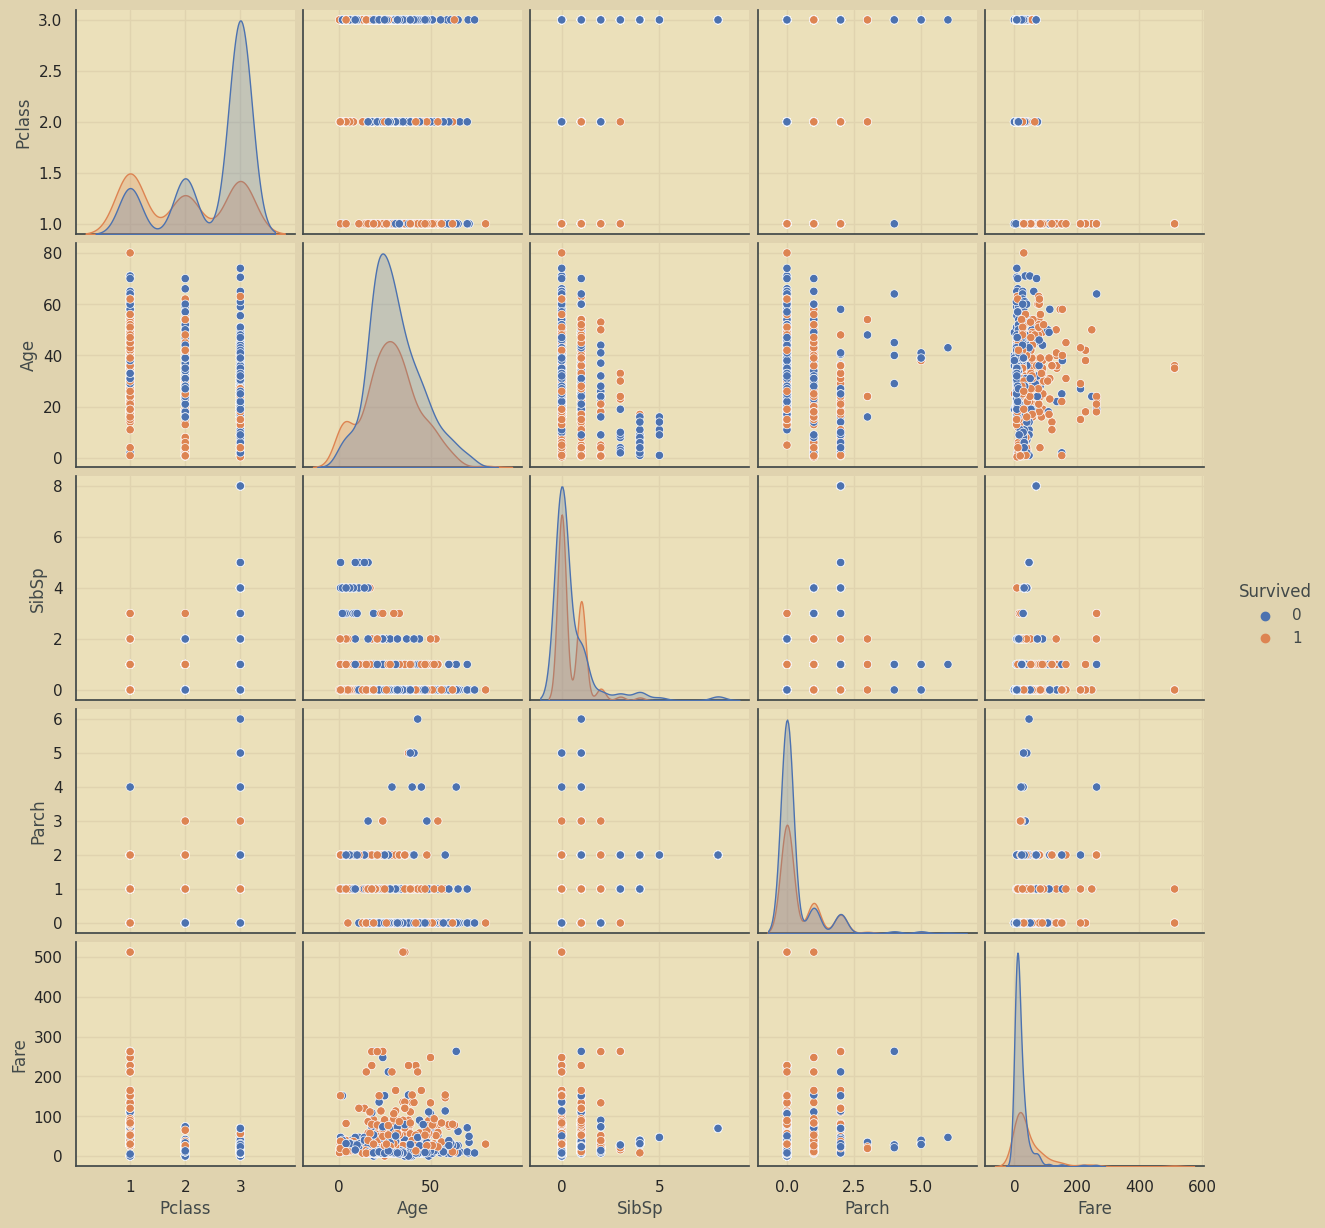

In [141]:
sns.pairplot(train, hue="Survived")

# Tratamiento de datos

In [142]:
train.isnull().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

## Treatment for null ages

In [143]:
print(train[(train["Pclass"]==1) & (train["Sex"]=="female")]["Age"].median())
print(train[(train["Pclass"]==1) & (train["Sex"]=="male")]["Age"].median())
print(train[(train["Pclass"]==2) & (train["Sex"]=="female")]["Age"].median())
print(train[(train["Pclass"]==2) & (train["Sex"]=="male")]["Age"].median())
print(train[(train["Pclass"]==3) & (train["Sex"]=="female")]["Age"].median())
print(train[(train["Pclass"]==3) & (train["Sex"]=="male")]["Age"].median())

35.0
40.0
28.0
30.0
21.5
25.0


In [144]:
from itertools import product
l1, l2 = [1,2,3], ["female","male"]
for c,s in product(l1,l2):
    msk = (train["Pclass"]==c) & (train["Sex"]==s)
    train.loc[msk,"Age"] = train[msk]["Age"].fillna(train[msk]["Age"].median())

## Treatment for null embarked

In [145]:
train.loc[train["Embarked"].isna(),"Embarked"] = "S"

In [147]:
scr_df = train.copy()

# Finding some relevant information

Changing categorical data to numerical for manipulation

In [148]:
sex_dict = {'male': 0, 'female': 1}
embarked_dict = {'S': 1, 'C': 2, 'Q': 3}
scr_df = scr_df[scr_df['Embarked'].notnull()].copy()
scr_df.loc[:, 'Sex'] = scr_df.loc[:,'Sex'].map(lambda x: sex_dict[x])
scr_df.loc[:, 'Embarked'] = scr_df.loc[:, 'Embarked'].map(lambda x: embarked_dict[x])

Getting  the correlation of the variables to find valueable information

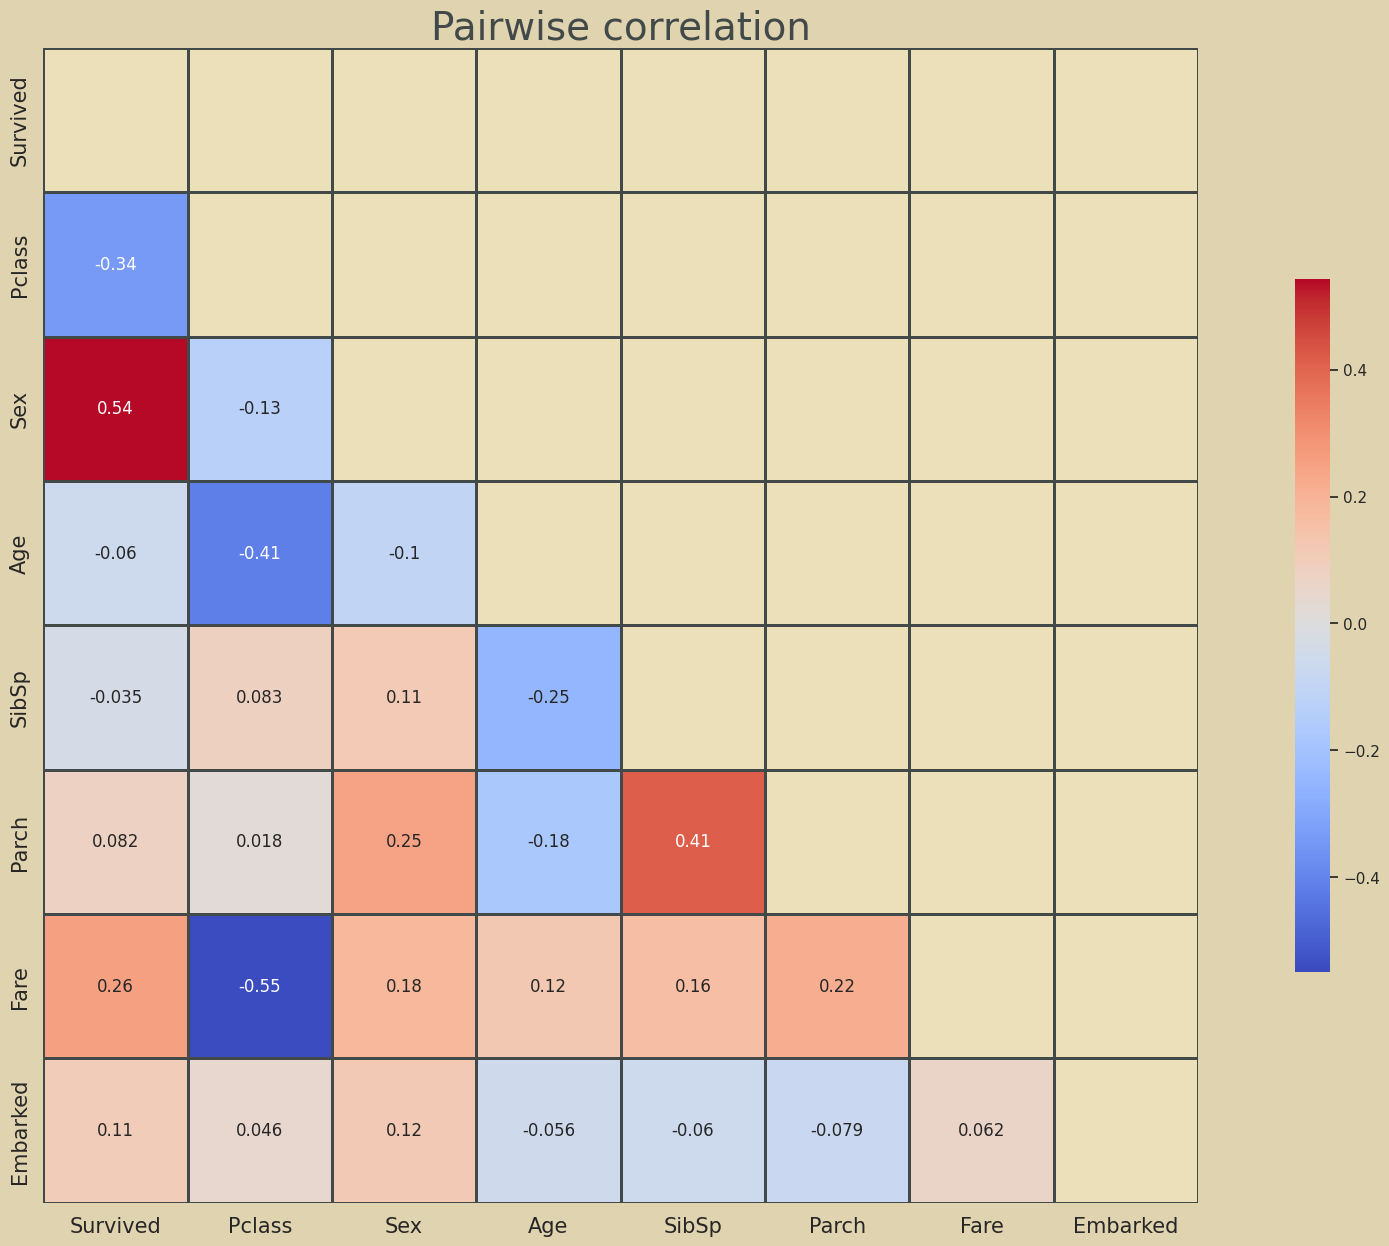

In [149]:
corr = scr_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
# change x- and y-label size
ax.tick_params(axis='both', which='major', labelsize=15)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=1, linecolor="#424949", annot=True, 
                cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation', fontsize="28");

Getting relation between sex and class survival probability

In [151]:
sex_class_prob_dict = {}
#  1 = female, 0 = male
for n in [0, 1]:
    for m in [1,2,3]:
        df = scr_df[(scr_df['Pclass'] == m) & (scr_df['Sex'] == n)].copy()
        gender = "hombre" if n == 0 else "mujer"
        sex_class_prob_dict[gender + f", clase: {str(m)}"] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

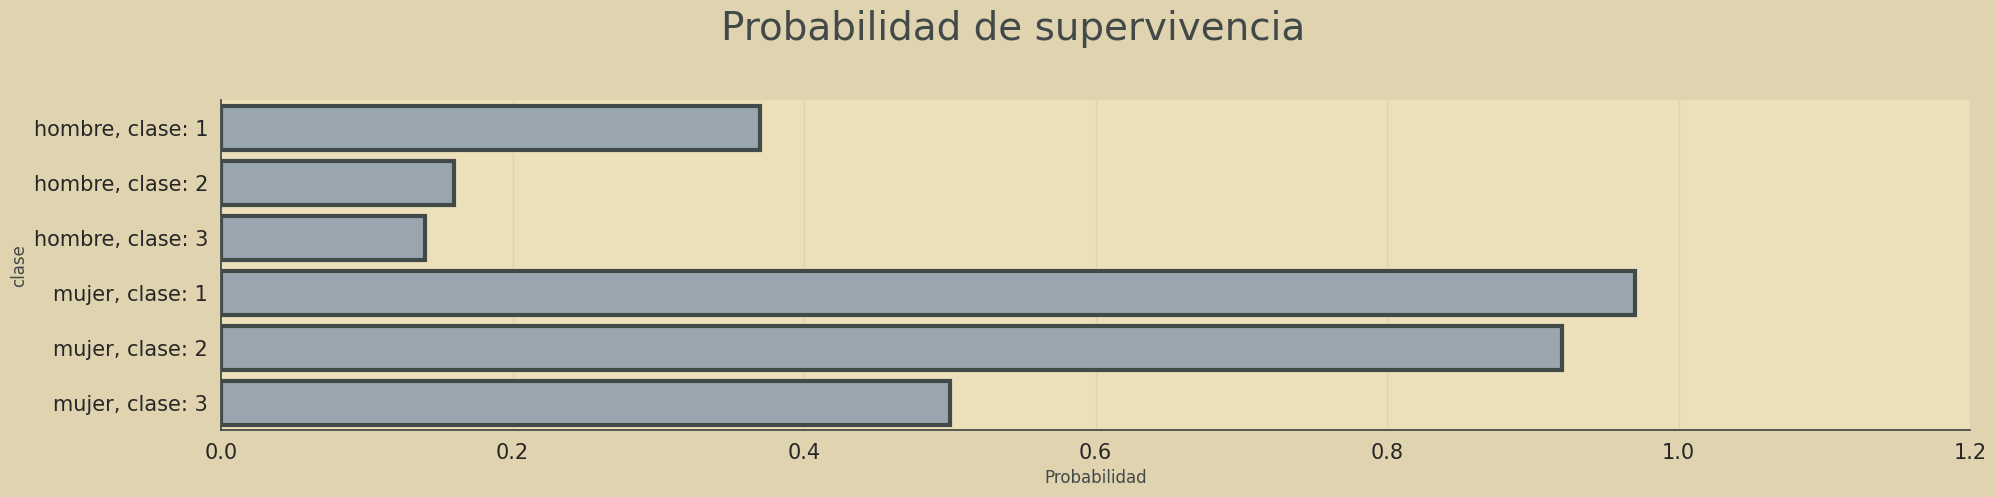

In [153]:
df = pd.DataFrame.from_dict(sex_class_prob_dict, orient='index').rename(columns={0: "Probabilidad"})
df['clase'] = df.index
fg = sns.catplot(data=df, kind="bar", y="clase", x="Probabilidad", height=5, color="#97A7B2",  aspect=3.9, linewidth = 3, ec="#424949")
fg.set_xticklabels(fontsize=15)
fg.set_yticklabels(fontsize=15)
fg.fig.subplots_adjust(top=0.8)
fg.fig.suptitle("Probabilidad de supervivencia", fontsize="28");